In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import scipy
import librosa.display
from IPython.display import Audio
import random

In [55]:
filename = 'xiao-hig/2.wav'
Audio(filename)

In [56]:
sr, samples = scipy.io.wavfile.read(filename) 
print("This utterance has {} samples\nSample rate is {}".format(samples.shape[0], sr))

This utterance has 384615 samples
Sample rate is 192000


In [57]:
def readfile(file):
    sr, samples = scipy.io.wavfile.read(file)
    print("Person : {}, VoiceID : {}".format(os.path.dirname(file), file[-5:]))
    return sr, samples

In [58]:
readfile(filename)

Person : xiao-hig, VoiceID : 2.wav


(192000, array([-734,  257, -404, ...,  257,  587, 1578], dtype=int16))

In [59]:
def get_stft(sr, samples, nfft=2048):
    X = librosa.stft(samples.astype('float'),n_fft=nfft)
    Xdb = librosa.amplitude_to_db(np.abs(X))
    print("Shape of STFT Original : {}".format(Xdb.shape))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.show()
    return Xdb

In [60]:
def gen_mel(sr, nfft, n_mels):
    # sample rate 太高导致mel filters 在高频处没有响应
    mel_basis = librosa.filters.mel(sr=sr, n_fft=nfft, n_mels=n_mels)
    print("Shape of Mel Filters : {}".format(mel_basis.shape))
    librosa.display.specshow(mel_basis, x_axis='linear',sr=sr)
    return mel_basis

In [61]:
def get_mfcc(dot_result, sr, n_mfcc):
    mfccs = librosa.feature.mfcc(S = dot_result, sr=sr, n_mfcc=n_mfcc)
    librosa.display.specshow(mfccs, x_axis='time')
    return mfccs

Person : xiao-hig, VoiceID : 2.wav
Shape of STFT Original : (1025, 752)


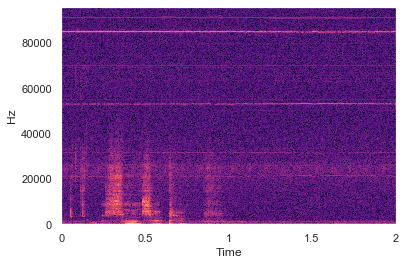

Shape of Mel Filters : (10, 1025)


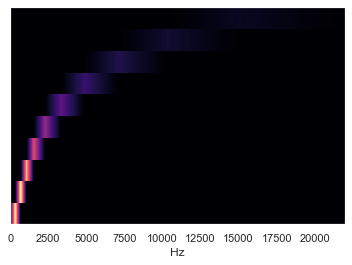

In [62]:
# fft points 影响mel filters columns. 2048 => 1025 cols
# sample rate 影响尺度，图像压缩的比例, sample rate 越小，横坐标最大值越小，响应就仅限于低频范围内
# nmels 只改变频率间隔, 不会改变fmax and fmin
sr, smaples = readfile(filename)
Xdb = get_stft(sr, samples, nfft=2048)
mel_basis = gen_mel(44000, nfft=2048, n_mels=10)

Shape of Mel Filters : (10, 1025)


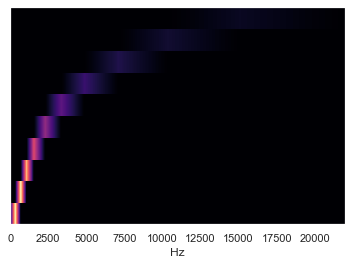

In [226]:
mel_basis1 = gen_mel(44000, nfft=2048, n_mels=10)

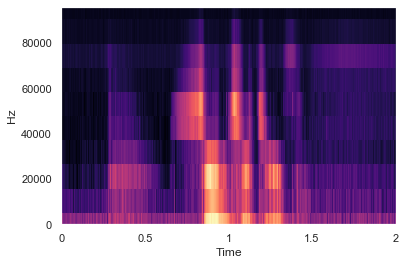

In [227]:
# large scale mel
dot_result = np.dot(mel_basis, Xdb)
librosa.display.specshow(dot_result, sr=sr, x_axis='time', y_axis='hz')
# plt.imshow(dot_result, cmap='hot', origin='lower')
# plt.rcParams["axes.grid"] = True
# plt.show()

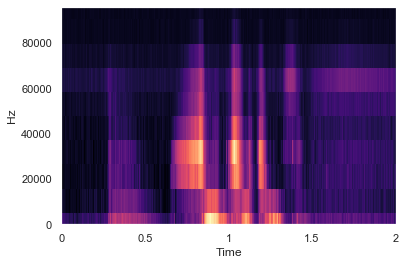

In [228]:
# small scale mel
dot_result = np.dot(mel_basis1, Xdb)
librosa.display.specshow(dot_result, sr=sr, x_axis='time', y_axis='hz')

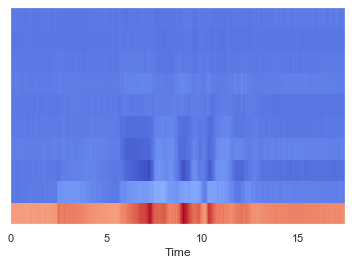

In [229]:
mfccs = get_mfcc(dot_result, sr, n_mfcc=10)

Person : Nick-low, VoiceID : 2.wav
Shape of STFT Original : (1025, 188)


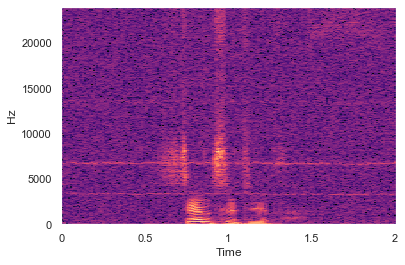

Shape of Mel Filters : (10, 1025)


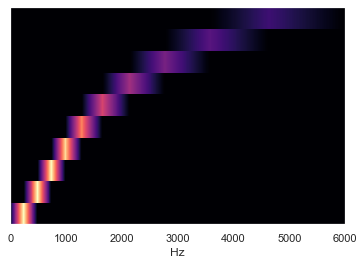

In [230]:
sr_less, smaples_less = readfile('Nick-low/2.wav')
Xdb = get_stft(sr_less, smaples_less)
mel_basis = gen_mel(12000, nfft=2048, n_mels=10)

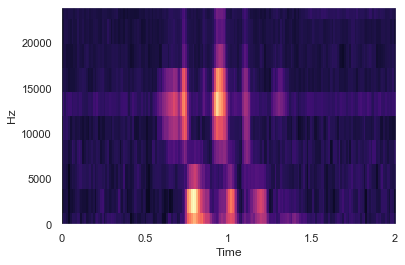

In [234]:
# small scale mel
dot_result = np.dot(mel_basis, Xdb)
librosa.display.specshow(dot_result, sr=sr_less, x_axis='time', y_axis='hz')

In [235]:
filename = 'Nick-hig/2.wav'
Audio(filename)

(10, 188)

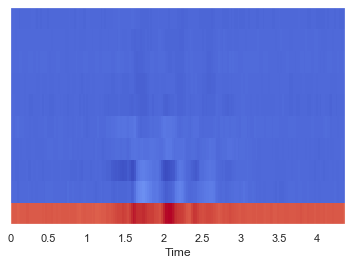

In [233]:
mfccs = get_mfcc(dot_result, sr, n_mfcc=10)
mfccs.shape

Person : Nick-hig, VoiceID : 3.wav
Shape of STFT Original : (1025, 752)


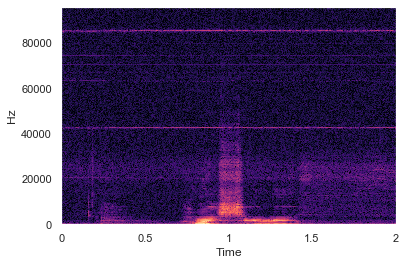

Shape of Mel Filters : (10, 1025)


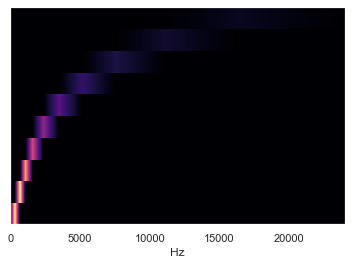

In [238]:
sr_less, smaples_less = readfile('Nick-hig/3.wav')
Xdb = get_stft(sr_less, smaples_less)
mel_basis = gen_mel(48000, nfft=2048, n_mels=10)

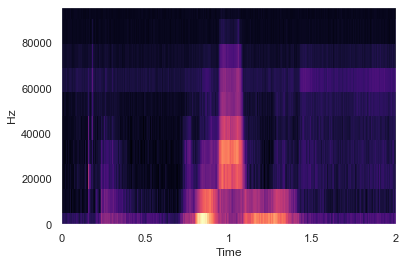

In [239]:
dot_result = np.dot(mel_basis, Xdb)
librosa.display.specshow(dot_result, sr=sr_less, x_axis='time', y_axis='hz')

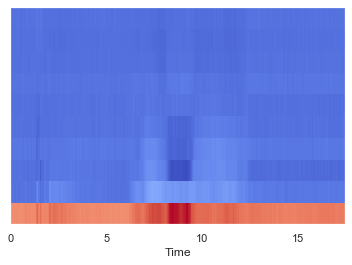

In [240]:
mfccs = get_mfcc(dot_result, sr, n_mfcc=10)

Person : hanqing-hig, VoiceID : 2.wav
Shape of STFT Original : (1025, 752)


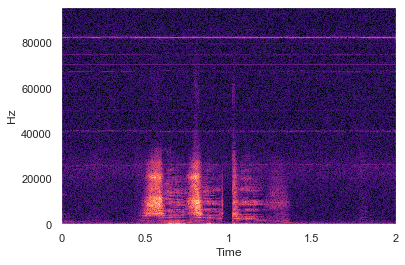

Shape of Mel Filters : (10, 1025)


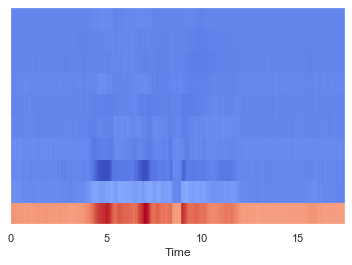

In [242]:
sr_less, smaples_less = readfile('hanqing-hig/2.wav')
Xdb = get_stft(sr_less, smaples_less)
mel_basis = gen_mel(48000, nfft=2048, n_mels=10)
dot_result = np.dot(mel_basis, Xdb)
librosa.display.specshow(dot_result, sr=sr_less, x_axis='time', y_axis='hz')
mfccs = get_mfcc(dot_result, sr, n_mfcc=10)

Person : hanqing-low, VoiceID : 2.wav
Shape of STFT Original : (1025, 188)


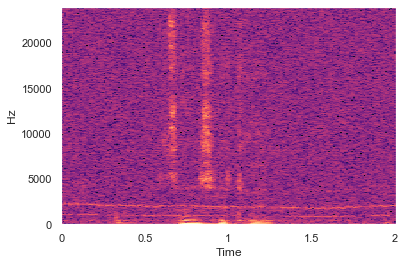

Shape of Mel Filters : (10, 1025)


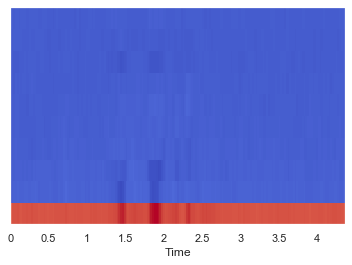

In [246]:
sr_less, smaples_less = readfile('hanqing-low/2.wav')
Xdb = get_stft(sr_less, smaples_less)
mel_basis = gen_mel(12000, nfft=2048, n_mels=10)
dot_result = np.dot(mel_basis, Xdb)
librosa.display.specshow(dot_result, sr=sr_less, x_axis='time', y_axis='hz')
mfccs = get_mfcc(dot_result, sr, n_mfcc=10)

Person : jianzhi-hig, VoiceID : 2.wav
Shape of STFT Original : (1025, 752)


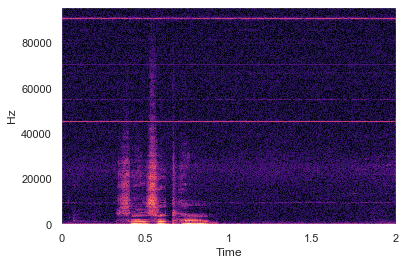

Shape of Mel Filters : (10, 1025)


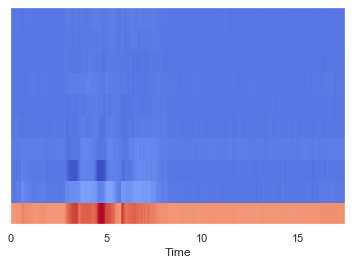

In [245]:
sr_less, smaples_less = readfile('jianzhi-hig/2.wav')
Xdb = get_stft(sr_less, smaples_less)
mel_basis = gen_mel(48000, nfft=2048, n_mels=10)
dot_result = np.dot(mel_basis, Xdb)
librosa.display.specshow(dot_result, sr=sr_less, x_axis='time', y_axis='hz')
mfccs = get_mfcc(dot_result, sr, n_mfcc=10)

Person : jianzhi-low, VoiceID : 2.wav
Shape of STFT Original : (1025, 188)


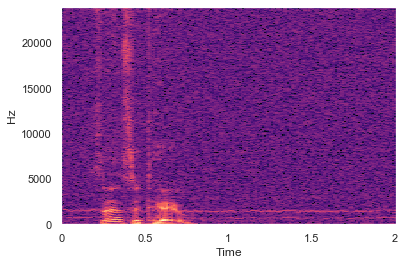

Shape of Mel Filters : (10, 1025)


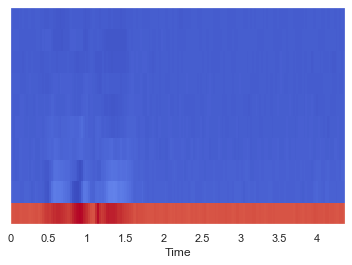

In [247]:
sr_less, smaples_less = readfile('jianzhi-low/2.wav')
Xdb = get_stft(sr_less, smaples_less)
mel_basis = gen_mel(12000, nfft=2048, n_mels=10)
dot_result = np.dot(mel_basis, Xdb)
librosa.display.specshow(dot_result, sr=sr_less, x_axis='time', y_axis='hz')
mfccs = get_mfcc(dot_result, sr, n_mfcc=10)

Person : liuli-hig, VoiceID : 2.wav
Shape of STFT Original : (1025, 752)


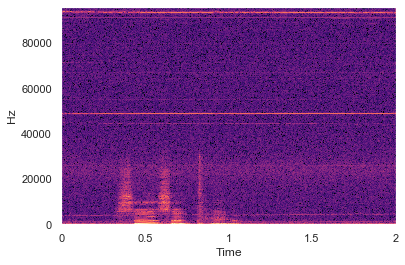

Shape of Mel Filters : (10, 1025)


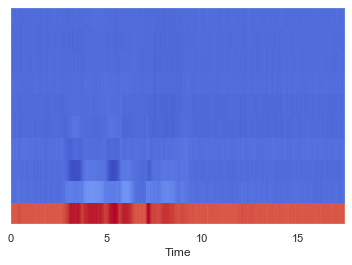

In [248]:
sr_less, smaples_less = readfile('liuli-hig/2.wav')
Xdb = get_stft(sr_less, smaples_less)
mel_basis = gen_mel(48000, nfft=2048, n_mels=10)
dot_result = np.dot(mel_basis, Xdb)
librosa.display.specshow(dot_result, sr=sr_less, x_axis='time', y_axis='hz')
mfccs = get_mfcc(dot_result, sr, n_mfcc=10)

Person : liuli-low, VoiceID : 2.wav
Shape of STFT Original : (1025, 188)


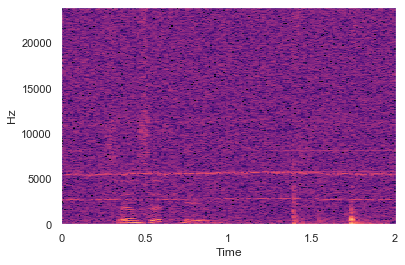

Shape of Mel Filters : (10, 1025)


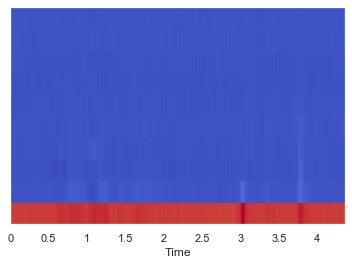

In [250]:
sr_less, smaples_less = readfile('liuli-low/2.wav')
Xdb = get_stft(sr_less, smaples_less)
mel_basis = gen_mel(12000, nfft=2048, n_mels=10)
dot_result = np.dot(mel_basis, Xdb)
librosa.display.specshow(dot_result, sr=sr_less, x_axis='time', y_axis='hz')
mfccs = get_mfcc(dot_result, sr, n_mfcc=10)

Person : hanqing-hig, VoiceID : 3.wav
Shape of STFT Original : (1025, 752)


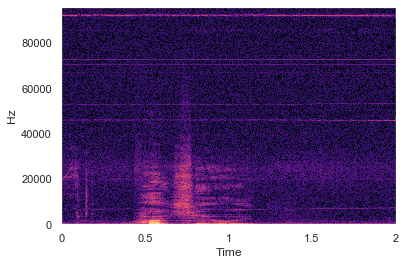

Shape of Mel Filters : (10, 1025)


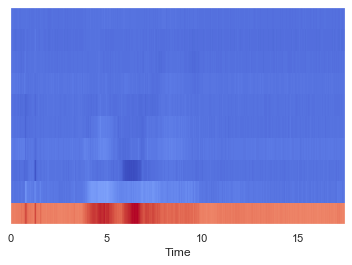

In [251]:
sr_less, smaples_less = readfile('hanqing-hig/3.wav')
Xdb = get_stft(sr_less, smaples_less)
mel_basis = gen_mel(48000, nfft=2048, n_mels=10)
dot_result = np.dot(mel_basis, Xdb)
librosa.display.specshow(dot_result, sr=sr_less, x_axis='time', y_axis='hz')
mfccs = get_mfcc(dot_result, sr, n_mfcc=10)